In [126]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [127]:
#Imagem que deseja analisar
img = cv2.imread('C:/Users/Usuario/Desktop/Contagens.png')

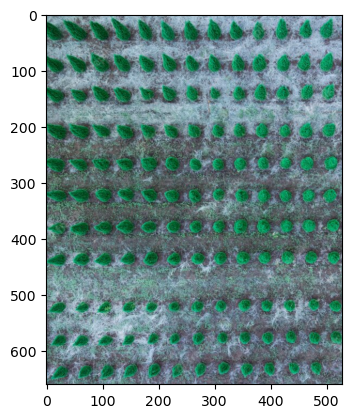

In [128]:
plt.imshow(img)

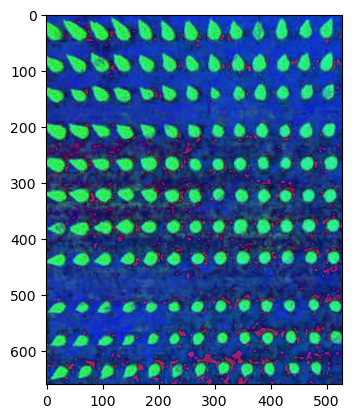

In [129]:
#efeito de saturação
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

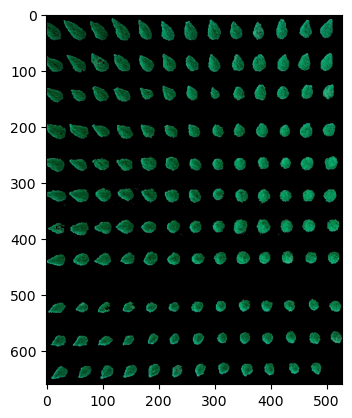

In [130]:
#intervalo cor verde
green_lower = np.array([0, 150, 50])
green_upper = np.array([255, 255, 255])

#Máscara binária com os pixels da cor verde
mask = cv2.inRange(hsv, green_lower, green_upper)

#Aplica a máscara na imagem original para extrair a região verde
gray = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(gray)

In [135]:
#Remover os ruídos
kernel = np.ones((1, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

#identificar planta
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Desenha um círculo vermelho no centro de cada planta
num_red_circles = 0
for cnt in contours:
    # Calcula o centro do contorno
    M = cv2.moments(cnt)
    if M["m00"] > 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        # Desenha um círculo vermelho no centro do ponto
        cv2.circle(img, (cx, cy), 5, (0, 0, 255), -1)
        num_red_circles += 1

#Exibe a imagem
cv2.imshow('Identificador e contador', img)

#Numero de pontos encontrados
num_red_circles_str = "Foram identificados: {} arvores".format(num_red_circles)

# Cria uma matriz preta do mesmo tamanho que a imagem original
black_bg = np.zeros_like(img)

# Adiciona o texto na matriz preta com a cor da fonte branca
cv2.putText(black_bg, num_red_circles_str, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), border_thickness, cv2.LINE_AA)

# Mescla a matriz preta com a imagem original
img_with_text = cv2.addWeighted(img, 1, black_bg, 1, 0)

#Exibe a imagem com o texto
cv2.imshow('Identificador e contador', img_with_text)

#Pressione uma tecla para sair
cv2.waitKey(0)

#Fechar aba
cv2.destroyAllWindows()
